# **Neural Networks Project**

**Data Description:**

**Objective:**

**Import Librabries**

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'1.13.1'

In [2]:
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


**Loading Data Set**

In [3]:
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

In [4]:
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

**Import train and test sets of SVHN dataset**

In [5]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

**Print shape of the data**

In [6]:
# Checking shape of Datasets
print("X_train dataset size",X_train.shape)
print("y_train dataset size",y_train.shape)
print("X_test dataset size",X_test.shape)
print("y_test dataset size",y_test.shape)
print("X_val dataset size",X_val.shape)
print("y_val dataset size",y_val.shape)

X_train dataset size (42000, 32, 32)
y_train dataset size (42000,)
X_test dataset size (18000, 32, 32)
y_test dataset size (18000,)
X_val dataset size (60000, 32, 32)
y_val dataset size (60000,)


In [7]:
print("X_train dataset size",X_train.shape[0])
print("y_train dataset size",y_train.shape[0])
print("X_test dataset size",X_test.shape[0])
print("y_test dataset sizee",y_test.shape[0])
print("X_val dataset size",X_val.shape[0])
print("y_val dataset size",y_val.shape[0])

X_train dataset size 42000
y_train dataset size 42000
X_test dataset size 18000
y_test dataset sizee 18000
X_val dataset size 60000
y_val dataset size 60000


In [8]:
print(X_train.dtype)
print(X_test.dtype)
print(y_train.dtype)
print(y_test.dtype)
print(X_val.dtype)
print(y_val.dtype)

float32
float32
uint8
uint8
float32
uint8


**Basic Image Classification**

***Visualizing the dataset***

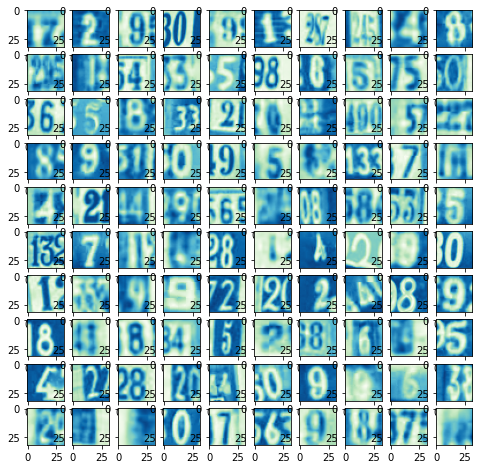

In [9]:
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='GnBu')
plt.show()

Label: 7


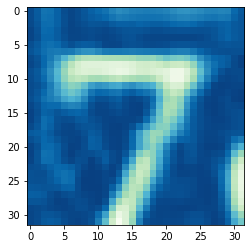

In [10]:
print("Label: {}".format(y_train[8000]))
plt.imshow(X_train[8000], cmap='GnBu')

**visualizing the first 10 images in the dataset and their labels for training set**

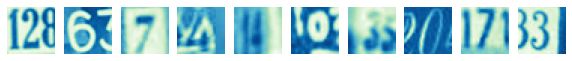

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [11]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="GnBu")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

***visualizing the first 10 images in the dataset and their labels  for test set***

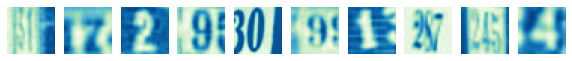

label for each of the above image: [1 7 2 9 0 9 1 8 4 4]


In [12]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape(32, 32), cmap="GnBu")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_test[0:10]))

**Data Pre-processing**

In [13]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train1 = X_train.reshape((X_train.shape[0], -1))
X_test1 = X_test.reshape((X_test.shape[0], -1))
X_val1 = X_val.reshape((X_val.shape[0], -1))

In [14]:
print("train shape",X_train1.shape)
print("test shape",X_test1.shape)
print("validation shape",X_val1.shape)

train shape (42000, 1024)
test shape (18000, 1024)
validation shape (60000, 1024)


***Normalizing the Input features***

In [15]:
X_train1 = X_train1.astype('float32')
X_test1 = X_test1.astype('float32')

#Normalizing the input
X_train1 = X_train1 / 255.0
X_test1 = X_test1/ 255.0
print('X_train1 shape:', X_train1.shape)
print(X_train1.shape[0], 'train samples')
print(X_test1.shape[0], 'test samples')

X_train1 shape: (42000, 1024)
42000 train samples
18000 test samples


In [16]:
X_train1[1]

array([0.34101608, 0.3414451 , 0.34656274, ..., 0.29498273, 0.30054745,
       0.31092745], dtype=float32)

**One-hot encode the class vector**


In [17]:
# converting y data into categorical (one-hot encoding)
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)
y_val1 = to_categorical(y_val)


In [18]:
print(X_train1.shape, X_test1.shape, X_val1.shape, y_train1.shape, y_test1.shape, y_val1.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


In [19]:
print(y_train1[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


**Build NN model**

In [20]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Nadam, SGD
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


**Starting with Basic Neural Network**

**Creating a model**

In [21]:
#Initialize the sequential model
model = Sequential()

**Adding layers (layers and activations)   Optimizer SGD lr = 0.01**

In [22]:
model.add(Dense(100, input_shape = (1024, )))
model.add(Activation('sigmoid'))
model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))


Instructions for updating:
Colocations handled automatically by placer.


**Model compile (optimizers and loss functions)**


In [23]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

**Summary of the model**

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               102500    
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
__________

**Training the model**

In [25]:
history = model.fit(X_train1, y_train1, batch_size = 32, epochs = 10, validation_split=0.15, verbose = 1)

Train on 35700 samples, validate on 6300 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
35700/35700 [==============================] - 4s 120us/sample - loss: 2.3081 - acc: 0.0974 - val_loss: 2.3083 - val_acc: 0.0992
Epoch 2/10
35700/35700 [==============================] - 4s 100us/sample - loss: 2.3046 - acc: 0.1008 - val_loss: 2.3058 - val_acc: 0.0967
Epoch 3/10
35700/35700 [==============================] - 4s 103us/sample - loss: 2.3047 - acc: 0.0996 - val_loss: 2.3039 - val_acc: 0.0994
Epoch 4/10
35700/35700 [==============================] - 3s 98us/sample - loss: 2.3046 - acc: 0.1018 - val_loss: 2.3047 - val_acc: 0.0992
Epoch 5/10
35700/35700 [==============================] - 4s 100us/sample - loss: 2.3049 - acc: 0.0982 - val_loss: 2.3047 - val_acc: 0.0967
Epoch 6/10
35700/35700 [==============================] - 4s 103us/sample - loss: 2.3048 - acc: 0.1008 - val_loss: 2.3036 - val_acc: 0.0994
Epoch 7/10
35700/35700 [==============================] - 4s 102

**Evaluation**

In [26]:
results1 = model.evaluate(X_test1, y_test1)

18000/18000 [==============================] - 1s 46us/sample - loss: 2.3054 - acc: 0.1018


In [27]:
print('Test Loss :', results1[0])
print('Test accuracy : ', results1[1])

Test Loss : 2.305391847398546
Test accuracy :  0.10177778


**Weight Initialization  with Optimizer SGD lr = 0.001**

In [28]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(100, input_shape = (1024, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(100, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(100, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(100, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))  
    model.add(Dense(100, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [29]:
model = mlp_model()
history = model.fit(X_train1, y_train1, batch_size = 32, epochs = 10, validation_split=0.15, verbose = 1)

Train on 35700 samples, validate on 6300 samples
Epoch 1/10
35700/35700 [==============================] - 4s 121us/sample - loss: 2.3418 - acc: 0.1004 - val_loss: 2.3033 - val_acc: 0.0967
Epoch 2/10
35700/35700 [==============================] - 4s 104us/sample - loss: 2.3029 - acc: 0.1000 - val_loss: 2.3035 - val_acc: 0.0970
Epoch 3/10
35700/35700 [==============================] - 4s 105us/sample - loss: 2.3028 - acc: 0.1020 - val_loss: 2.3026 - val_acc: 0.0967
Epoch 4/10
35700/35700 [==============================] - 4s 103us/sample - loss: 2.3028 - acc: 0.1022 - val_loss: 2.3033 - val_acc: 0.0954
Epoch 5/10
35700/35700 [==============================] - 4s 105us/sample - loss: 2.3028 - acc: 0.1020 - val_loss: 2.3034 - val_acc: 0.0994
Epoch 6/10
35700/35700 [==============================] - 4s 106us/sample - loss: 2.3029 - acc: 0.0986 - val_loss: 2.3029 - val_acc: 0.0959
Epoch 7/10
35700/35700 [==============================] - 4s 106us/sample - loss: 2.3028 - acc: 0.1004 - val_lo

In [30]:
results2 = model.evaluate(X_test1, y_test1)

18000/18000 [==============================] - 1s 43us/sample - loss: 2.3032 - acc: 0.0955


In [31]:
print('Test Loss :', results2[0])
print('Test accuracy: ', results2[1])

Test Loss : 2.3032371669345433
Test accuracy:  0.0955


**Weight Initialization with Optimizer adam lr = 0.001**

In [32]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(100, input_shape = (1024, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(100, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(100, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(100, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))  
    model.add(Dense(100, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [33]:
model = mlp_model()
history = model.fit(X_train1, y_train1, batch_size = 32, epochs = 10, validation_split=0.15, verbose = 1)

Train on 35700 samples, validate on 6300 samples
Epoch 1/10
35700/35700 [==============================] - 6s 162us/sample - loss: 2.3017 - acc: 0.1092 - val_loss: 2.2473 - val_acc: 0.1452
Epoch 2/10
35700/35700 [==============================] - 6s 160us/sample - loss: 2.0440 - acc: 0.2150 - val_loss: 1.8532 - val_acc: 0.2983
Epoch 3/10
35700/35700 [==============================] - 5s 144us/sample - loss: 1.7712 - acc: 0.3310 - val_loss: 1.6317 - val_acc: 0.4011
Epoch 4/10
35700/35700 [==============================] - 5s 142us/sample - loss: 1.6176 - acc: 0.3970 - val_loss: 1.5866 - val_acc: 0.4010
Epoch 5/10
35700/35700 [==============================] - 5s 142us/sample - loss: 1.5410 - acc: 0.4238 - val_loss: 1.4846 - val_acc: 0.4460
Epoch 6/10
35700/35700 [==============================] - 5s 142us/sample - loss: 1.4849 - acc: 0.4462 - val_loss: 1.4639 - val_acc: 0.4476
Epoch 7/10
35700/35700 [==============================] - 5s 139us/sample - loss: 1.4382 - acc: 0.4564 - val_lo

In [34]:
results3 = model.evaluate(X_test1, y_test1)

18000/18000 [==============================] - 1s 46us/sample - loss: 1.3593 - acc: 0.4872


In [35]:
print('Test Loss :', results3[0])
print('Test accuracy: ', results3[1])

Test Loss : 1.359270191192627
Test accuracy:  0.48722222


**Insights : Based on above accuracy value adam optimizer is better than SGD optimizer**

**Nonlinearity (Activation function) change to Rectified Linear Unit**

Sigmoid functions suffer from gradient vanishing problem, making training slower
There are many choices apart from sigmoid and tanh; try many of them!
'relu' (rectified linear unit) is one of the most popular ones

In [36]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(100, input_shape = (1024, )))
    model.add(Activation('relu'))    
    model.add(Dense(100))
    model.add(Activation('relu'))    
    model.add(Dense(100))
    model.add(Activation('relu'))    
    model.add(Dense(100))
    model.add(Activation('relu'))    
    model.add(Dense(100))
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [37]:
model = mlp_model()
history = model.fit(X_train1, y_train1, batch_size = 32, epochs = 10, validation_split=0.15, verbose = 1)

Train on 35700 samples, validate on 6300 samples
Epoch 1/10
35700/35700 [==============================] - 6s 163us/sample - loss: 2.3036 - acc: 0.1003 - val_loss: 2.3033 - val_acc: 0.1008
Epoch 2/10
35700/35700 [==============================] - 5s 137us/sample - loss: 2.3028 - acc: 0.1005 - val_loss: 2.3029 - val_acc: 0.0967
Epoch 3/10
35700/35700 [==============================] - 5s 132us/sample - loss: 2.3027 - acc: 0.1010 - val_loss: 2.3029 - val_acc: 0.0967
Epoch 4/10
35700/35700 [==============================] - 5s 136us/sample - loss: 2.3027 - acc: 0.1017 - val_loss: 2.3032 - val_acc: 0.0960
Epoch 5/10
35700/35700 [==============================] - 5s 134us/sample - loss: 2.3027 - acc: 0.0990 - val_loss: 2.3034 - val_acc: 0.0960
Epoch 6/10
35700/35700 [==============================] - 5s 135us/sample - loss: 2.3027 - acc: 0.1008 - val_loss: 2.3033 - val_acc: 0.0967
Epoch 7/10
35700/35700 [==============================] - 5s 145us/sample - loss: 2.3027 - acc: 0.1015 - val_lo

In [38]:
results4 = model.evaluate(X_test1, y_test1)

18000/18000 [==============================] - 1s 60us/sample - loss: 2.3030 - acc: 0.0955


In [39]:

print('Test Loss :', results4[0])
print('Test accuracy: ', results4[1])

Test Loss : 2.3030026247236464
Test accuracy:  0.0955


**Apply Batch Normalization Before activation**


Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective
Normalize each mini-batch before nonlinearity

In [40]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(100, input_shape = (1024, )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(100))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(100))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(100))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(100))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [41]:
model = mlp_model()
history = model.fit(X_train1, y_train1, batch_size = 32, epochs = 10, validation_split=0.15, verbose = 1)

Train on 35700 samples, validate on 6300 samples
Epoch 1/10
35700/35700 [==============================] - 10s 285us/sample - loss: 1.5623 - acc: 0.4729 - val_loss: 1.4827 - val_acc: 0.5006
Epoch 2/10
35700/35700 [==============================] - 8s 225us/sample - loss: 1.1107 - acc: 0.6416 - val_loss: 1.4028 - val_acc: 0.5259
Epoch 3/10
35700/35700 [==============================] - 8s 228us/sample - loss: 0.9791 - acc: 0.6883 - val_loss: 1.2616 - val_acc: 0.5938
Epoch 4/10
35700/35700 [==============================] - 8s 221us/sample - loss: 0.8982 - acc: 0.7137 - val_loss: 1.0413 - val_acc: 0.6663
Epoch 5/10
35700/35700 [==============================] - 8s 219us/sample - loss: 0.8370 - acc: 0.7336 - val_loss: 1.0932 - val_acc: 0.6467
Epoch 6/10
35700/35700 [==============================] - 8s 219us/sample - loss: 0.7863 - acc: 0.7528 - val_loss: 1.0014 - val_acc: 0.6656
Epoch 7/10
35700/35700 [==============================] - 8s 223us/sample - loss: 0.7537 - acc: 0.7608 - val_l

In [43]:
results5 = model.evaluate(X_test1, y_test1)

18000/18000 [==============================] - 1s 67us/sample - loss: 0.9441 - acc: 0.7035


In [44]:
print('Test Loss :', results5[0])
print('Test accuracy: ', results5[1])

Test Loss : 0.9440775915251838
Test accuracy:  0.7035


**Apply Dropout  with SGD Optimizer lr = 0.001**

In [45]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(100, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [46]:
model = mlp_model()
history = model.fit(X_train1, y_train1, batch_size = 32, epochs = 10, validation_split=0.15, verbose = 1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 35700 samples, validate on 6300 samples
Epoch 1/10
35700/35700 [==============================] - 10s 291us/sample - loss: 2.6840 - acc: 0.1046 - val_loss: 2.3283 - val_acc: 0.1219
Epoch 2/10
35700/35700 [==============================] - 8s 227us/sample - loss: 2.5334 - acc: 0.1130 - val_loss: 2.2424 - val_acc: 0.1630
Epoch 3/10
35700/35700 [==============================] - 8s 230us/sample - loss: 2.4636 - acc: 0.1237 - val_loss: 2.1930 - val_acc: 0.1957
Epoch 4/10
35700/35700 [==============================] - 8s 228us/sample - loss: 2.4102 - acc: 0.1337 - val_loss: 2.1451 - val_acc: 0.2248
Epoch 5/10
35700/35700 [==============================] - 7s 191us/sample - loss: 2.3592 - acc: 0.1443 - val_loss: 2.1140 - val_acc: 0.2413
Epoch 6/10
35700/35700 [==============================] - 6s 171us/sample - loss: 2.3084 - acc: 0.1590 - val_loss: 2.0677 - val_acc: 0.

In [47]:
results6 = model.evaluate(X_test1, y_test1)

18000/18000 [==============================] - 1s 61us/sample - loss: 1.9196 - acc: 0.3584


In [48]:
print('Test Loss :', results6[0])
print('Test accuracy: ', results6[1])

Test Loss : 1.919572834332784
Test accuracy:  0.3583889


**Apply Dropout with Adam Optimizer lr = 0.001**

In [49]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(100, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [50]:
model = mlp_model()
history = model.fit(X_train1, y_train1, batch_size = 32, epochs = 10, validation_split=0.15, verbose = 1)

Train on 35700 samples, validate on 6300 samples
Epoch 1/10
35700/35700 [==============================] - 8s 218us/sample - loss: 2.2384 - acc: 0.1788 - val_loss: 1.9097 - val_acc: 0.3025
Epoch 2/10
35700/35700 [==============================] - 7s 188us/sample - loss: 1.7630 - acc: 0.3697 - val_loss: 1.5416 - val_acc: 0.4694
Epoch 3/10
35700/35700 [==============================] - 7s 188us/sample - loss: 1.5385 - acc: 0.4748 - val_loss: 1.4672 - val_acc: 0.5222
Epoch 4/10
35700/35700 [==============================] - 6s 180us/sample - loss: 1.4296 - acc: 0.5285 - val_loss: 1.2905 - val_acc: 0.5714
Epoch 5/10
35700/35700 [==============================] - 6s 170us/sample - loss: 1.3494 - acc: 0.5629 - val_loss: 1.0768 - val_acc: 0.6544
Epoch 6/10
35700/35700 [==============================] - 6s 172us/sample - loss: 1.2711 - acc: 0.5975 - val_loss: 1.2054 - val_acc: 0.6241
Epoch 7/10
35700/35700 [==============================] - 6s 171us/sample - loss: 1.2134 - acc: 0.6151 - val_lo

In [51]:
results7 = model.evaluate(X_test1, y_test1)

18000/18000 [==============================] - 1s 56us/sample - loss: 1.1328 - acc: 0.6377


In [52]:
print('Test Loss :', results7[0])
print('Test accuracy: ', results7[1])

Test Loss : 1.1327697905964322
Test accuracy:  0.6377222


**Insights : For better accuracy to choose optimizer adam with RELU activation than SGD with ReLU**

**Changing the layers**

In [53]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(100, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001, decay=0.00001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [54]:
model = mlp_model()
history = model.fit(X_train1, y_train1, batch_size = 32, epochs = 10, validation_split=0.15, verbose = 1)

Train on 35700 samples, validate on 6300 samples
Epoch 1/10
35700/35700 [==============================] - 9s 245us/sample - loss: 2.3277 - acc: 0.1413 - val_loss: 2.0262 - val_acc: 0.2481
Epoch 2/10
35700/35700 [==============================] - 7s 206us/sample - loss: 1.8808 - acc: 0.3140 - val_loss: 1.5950 - val_acc: 0.4263
Epoch 3/10
35700/35700 [==============================] - 8s 215us/sample - loss: 1.6457 - acc: 0.4190 - val_loss: 1.5392 - val_acc: 0.4671
Epoch 4/10
35700/35700 [==============================] - 8s 224us/sample - loss: 1.5327 - acc: 0.4722 - val_loss: 1.5315 - val_acc: 0.4613
Epoch 5/10
35700/35700 [==============================] - 7s 206us/sample - loss: 1.4438 - acc: 0.5157 - val_loss: 1.2057 - val_acc: 0.6024
Epoch 6/10
35700/35700 [==============================] - 7s 201us/sample - loss: 1.3863 - acc: 0.5397 - val_loss: 1.1245 - val_acc: 0.6424
Epoch 7/10
35700/35700 [==============================] - 7s 210us/sample - loss: 1.3224 - acc: 0.5711 - val_lo

In [55]:
results8 = model.evaluate(X_test1, y_test1)


18000/18000 [==============================] - 1s 69us/sample - loss: 1.1619 - acc: 0.6234


In [56]:
print('Test Loss :', results8[0])
print('Test accuracy: ', results8[1])

Test Loss : 1.1619231570561728
Test accuracy:  0.62344444


**Insights: Changing (increasing) the Layers decrease the accuracy.**

### **Final Model with Activation, Batch Normalization and Dropout**

**Optimizer adam with Learning rate lr = 0.0001**

In [57]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(100, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.0001, decay=0.00001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [58]:
model = mlp_model()
history = model.fit(X_train1, y_train1, epochs = 100, verbose = 1, validation_split=0.15, batch_size=32)

Train on 35700 samples, validate on 6300 samples
Epoch 1/100
35700/35700 [==============================] - 8s 232us/sample - loss: 2.5626 - acc: 0.1083 - val_loss: 2.2470 - val_acc: 0.1638
Epoch 2/100
35700/35700 [==============================] - 7s 193us/sample - loss: 2.3660 - acc: 0.1444 - val_loss: 2.1328 - val_acc: 0.2306
Epoch 3/100
35700/35700 [==============================] - 7s 197us/sample - loss: 2.1810 - acc: 0.2048 - val_loss: 1.8923 - val_acc: 0.3446
Epoch 4/100
35700/35700 [==============================] - 7s 189us/sample - loss: 2.0184 - acc: 0.2652 - val_loss: 1.7479 - val_acc: 0.4060
Epoch 5/100
35700/35700 [==============================] - 7s 195us/sample - loss: 1.8963 - acc: 0.3155 - val_loss: 1.5628 - val_acc: 0.4905
Epoch 6/100
35700/35700 [==============================] - 7s 198us/sample - loss: 1.7865 - acc: 0.3682 - val_loss: 1.4853 - val_acc: 0.5278
Epoch 7/100
35700/35700 [==============================] - 7s 190us/sample - loss: 1.6827 - acc: 0.4162 -

In [59]:
results9 = model.evaluate(X_test1, y_test1)

18000/18000 [==============================] - 1s 63us/sample - loss: 0.6106 - acc: 0.8145


In [60]:
print('Test Loss :', results9[0])
print('Test accuracy: ', results9[1])

Test Loss : 0.6105981702274746
Test accuracy:  0.8145


**Optimizer adam with Learning rate lr = 0.001**

In [61]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(100, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001, decay=0.00001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [62]:
model = mlp_model()
history = model.fit(X_train1, y_train1, epochs = 100, verbose = 1, validation_split=0.15, batch_size=32)

Train on 35700 samples, validate on 6300 samples
Epoch 1/100
35700/35700 [==============================] - 9s 255us/sample - loss: 2.2315 - acc: 0.1827 - val_loss: 1.8017 - val_acc: 0.3502
Epoch 2/100
35700/35700 [==============================] - 7s 204us/sample - loss: 1.7063 - acc: 0.3985 - val_loss: 1.4423 - val_acc: 0.5330
Epoch 3/100
35700/35700 [==============================] - 7s 200us/sample - loss: 1.5081 - acc: 0.4925 - val_loss: 1.2740 - val_acc: 0.5937
Epoch 4/100
35700/35700 [==============================] - 7s 201us/sample - loss: 1.3904 - acc: 0.5466 - val_loss: 1.3353 - val_acc: 0.5459
Epoch 5/100
35700/35700 [==============================] - 7s 202us/sample - loss: 1.3055 - acc: 0.5822 - val_loss: 1.1700 - val_acc: 0.6267
Epoch 6/100
35700/35700 [==============================] - 7s 199us/sample - loss: 1.2490 - acc: 0.6054 - val_loss: 1.0346 - val_acc: 0.6678
Epoch 7/100
35700/35700 [==============================] - 7s 202us/sample - loss: 1.2015 - acc: 0.6195 -

In [63]:
results10 = model.evaluate(X_test1, y_test1)


18000/18000 [==============================] - 1s 82us/sample - loss: 0.5476 - acc: 0.8309


In [64]:
print('Test Loss :', results10[0])
print('Test accuracy: ', results10[1])


Test Loss : 0.54758860039711
Test accuracy:  0.8309444


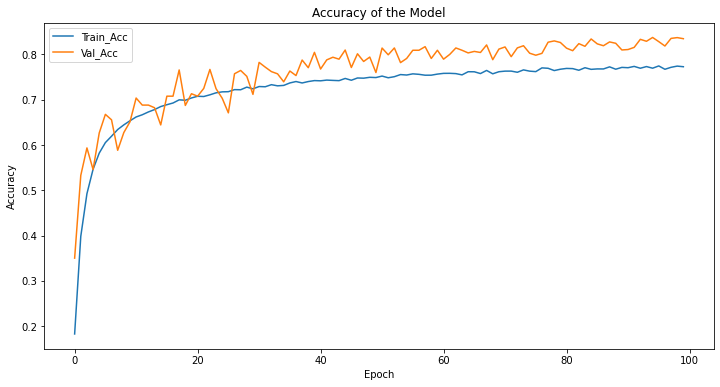

In [65]:
# training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy of the Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')


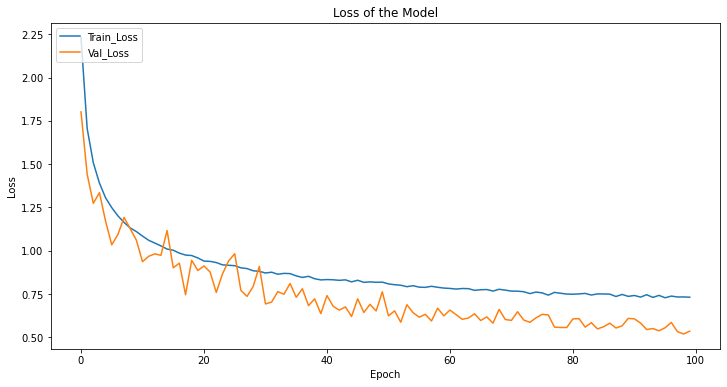

In [66]:
# training and validation loss
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train_Loss","Val_Loss"], loc='upper left')

In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 100)               102500    
_________________________________________________________________
batch_normalization_v1_26 (B (None, 100)               400       
_________________________________________________________________
activation_55 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_v1_27 (B (None, 100)               400       
_________________________________________________________________
activation_56 (Activation)   (None, 100)               0         
__________

In [68]:
#Getting prediction of test set
prediction = model.predict([X_test1])

In [69]:
print(prediction)

[[9.5779993e-02 4.0042770e-01 9.1754548e-02 ... 1.3793159e-01
  5.0494984e-02 4.1531224e-02]
 [3.5591814e-04 3.6234609e-03 9.4610888e-01 ... 3.5393935e-02
  3.7969959e-03 2.3169192e-03]
 [1.0606294e-04 4.6145378e-04 9.9237680e-01 ... 1.8083471e-03
  1.5070493e-03 9.3185785e-04]
 ...
 [1.0422533e-03 3.2201223e-02 3.2549070e-03 ... 9.5787001e-01
  1.1046132e-03 9.6002320e-04]
 [9.0129795e-03 1.8042934e-03 3.8844869e-03 ... 1.9194079e-03
  2.6659148e-02 9.3291235e-01]
 [1.4888102e-04 5.1144359e-04 9.8840767e-01 ... 3.0721403e-03
  2.4409257e-03 1.0235102e-03]]


In [70]:
predict=[]
for i in prediction:
    predict.append(np.argmax(i))
print(predict) #Seeing the predictions

[1, 2, 2, 9, 0, 9, 1, 8, 1, 4, 8, 2, 1, 4, 3, 5, 8, 6, 8, 5, 0, 6, 5, 8, 3, 2, 0, 8, 9, 3, 2, 8, 9, 1, 0, 9, 5, 3, 3, 7, 0, 4, 2, 4, 9, 6, 0, 8, 8, 3, 5, 3, 7, 1, 4, 8, 4, 4, 0, 9, 0, 1, 8, 9, 9, 2, 2, 7, 2, 8, 9, 8, 3, 8, 4, 5, 2, 8, 6, 0, 5, 4, 2, 8, 2, 3, 0, 9, 9, 1, 3, 2, 1, 5, 0, 7, 6, 9, 8, 7, 7, 7, 5, 2, 1, 4, 9, 6, 1, 4, 1, 0, 9, 0, 8, 4, 4, 1, 0, 9, 0, 3, 9, 0, 5, 8, 3, 9, 6, 1, 6, 6, 0, 9, 4, 9, 8, 8, 8, 4, 9, 2, 4, 5, 5, 0, 0, 0, 9, 8, 8, 8, 8, 9, 4, 8, 8, 4, 3, 7, 0, 0, 1, 5, 9, 2, 7, 6, 7, 1, 3, 2, 9, 0, 4, 5, 0, 5, 5, 5, 7, 2, 9, 5, 1, 4, 1, 3, 8, 9, 6, 8, 4, 9, 3, 2, 7, 8, 6, 3, 3, 5, 2, 3, 0, 2, 1, 8, 2, 8, 9, 5, 2, 0, 2, 9, 0, 2, 0, 8, 5, 1, 2, 7, 8, 9, 6, 0, 1, 3, 1, 8, 8, 3, 0, 8, 4, 7, 7, 3, 8, 7, 2, 3, 9, 0, 8, 4, 1, 3, 3, 2, 7, 1, 5, 7, 0, 0, 8, 2, 4, 6, 4, 9, 7, 7, 9, 1, 8, 2, 9, 4, 5, 0, 0, 7, 7, 0, 8, 9, 6, 3, 7, 7, 8, 6, 3, 2, 5, 2, 5, 4, 3, 0, 9, 1, 4, 5, 5, 5, 9, 7, 7, 1, 6, 1, 7, 1, 1, 4, 8, 6, 0, 3, 3, 2, 6, 1, 0, 1, 0, 6, 5, 1, 7, 1, 0, 7, 7, 0, 6, 3, 8, 

### **Classification accuracy metrics**

In [71]:
print("\nConfusion Matrix")
confusion_matrix(y_test,predict)


Confusion Matrix


array([[1590,   48,    4,   25,   25,    6,   22,   25,   33,   36],
       [  37, 1602,   14,   24,   46,    6,   10,   57,   24,    8],
       [  21,   53, 1462,   39,   33,   11,    5,  102,   34,   43],
       [  14,   74,   30, 1370,   25,   86,    9,   37,   54,   20],
       [  38,   73,   14,   21, 1575,    8,   17,   20,   19,   27],
       [  10,   33,    8,  125,   18, 1400,   50,   17,   73,   34],
       [  51,   36,   11,   25,   51,   48, 1429,   13,  156,   12],
       [  17,  102,   33,   21,   14,    8,    9, 1577,   13,   14],
       [  24,   55,   14,   46,   26,   25,   68,   16, 1486,   52],
       [  68,   62,   19,   47,   28,   31,    6,   23,   54, 1466]],
      dtype=int64)

In [72]:
print("\nClassification Metrics")
print(classification_report(y_test,predict))


Classification Metrics
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1814
           1       0.75      0.88      0.81      1828
           2       0.91      0.81      0.86      1803
           3       0.79      0.80      0.79      1719
           4       0.86      0.87      0.86      1812
           5       0.86      0.79      0.82      1768
           6       0.88      0.78      0.83      1832
           7       0.84      0.87      0.85      1808
           8       0.76      0.82      0.79      1812
           9       0.86      0.81      0.83      1804

    accuracy                           0.83     18000
   macro avg       0.83      0.83      0.83     18000
weighted avg       0.83      0.83      0.83     18000



### **Summary Insights:**
              In this Image Classification problem Adam optimizer gives better accuracy than SGD optimizer.
      
              Final model with adam optimizer with learning rate lr = 0.001 gives better accuracy than 
      learning rate lr = 0.0001
      